In [1]:
import pandas as pd

dirpath = "F:\\All_Prep\\flu prediction\\"

canada = pd.read_excel(dirpath+"canada_final.xlsx", index_col=0)
canada = canada[canada.index>='2010-01-01']
canada.tail()

,who,influenza,flu
date,,,
2018-11-01,2724.0,32,21
2018-12-01,10191.0,45,16
2019-01-01,11046.0,65,20
2019-02-01,6825.0,40,12
2019-03-01,1721.0,33,11


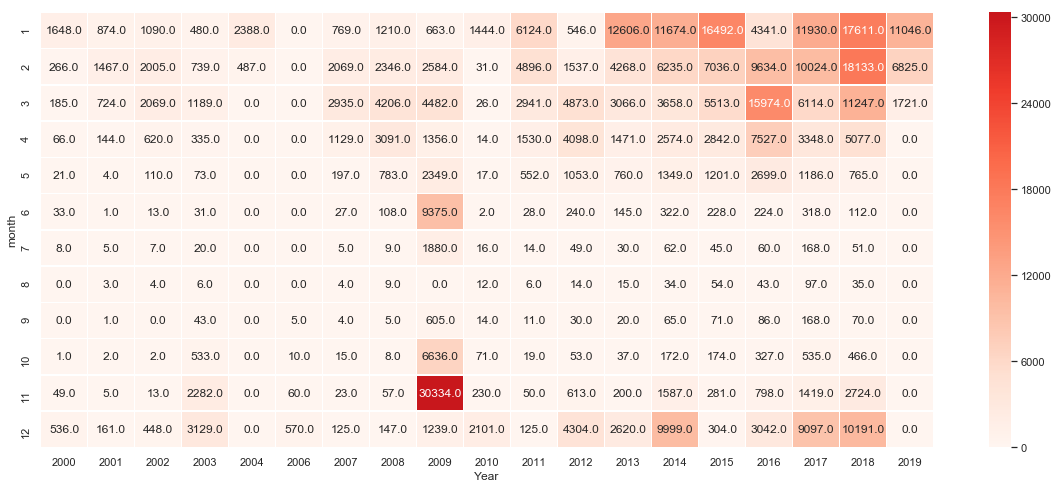

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
canada_group = canada.groupby(['Year','month'],as_index=False).ALL_INF.sum() 
outbreak = canada_group.pivot("month", "Year", "ALL_INF")
outbreak = outbreak.fillna(0)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(outbreak, cmap='Reds', center=20000, annot=True, fmt='.1f',linewidths=.5, ax=ax)

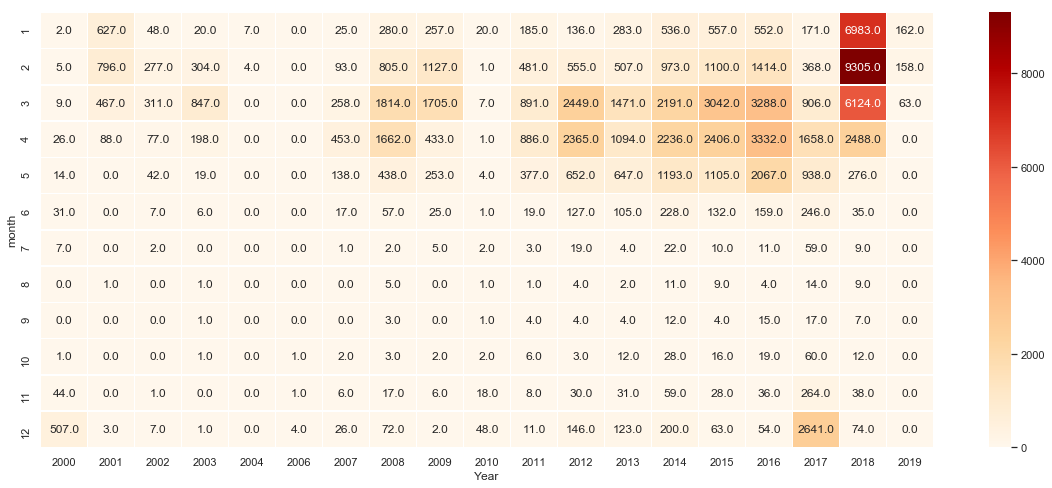

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
group = canada.groupby(['Year','month'],as_index=False).INF_B.sum() 
outbreak = group.pivot("month", "Year", "INF_B")
outbreak = outbreak.fillna(0)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(outbreak, cmap='OrRd',annot=True, fmt='.1f',linewidths=.5, ax=ax)

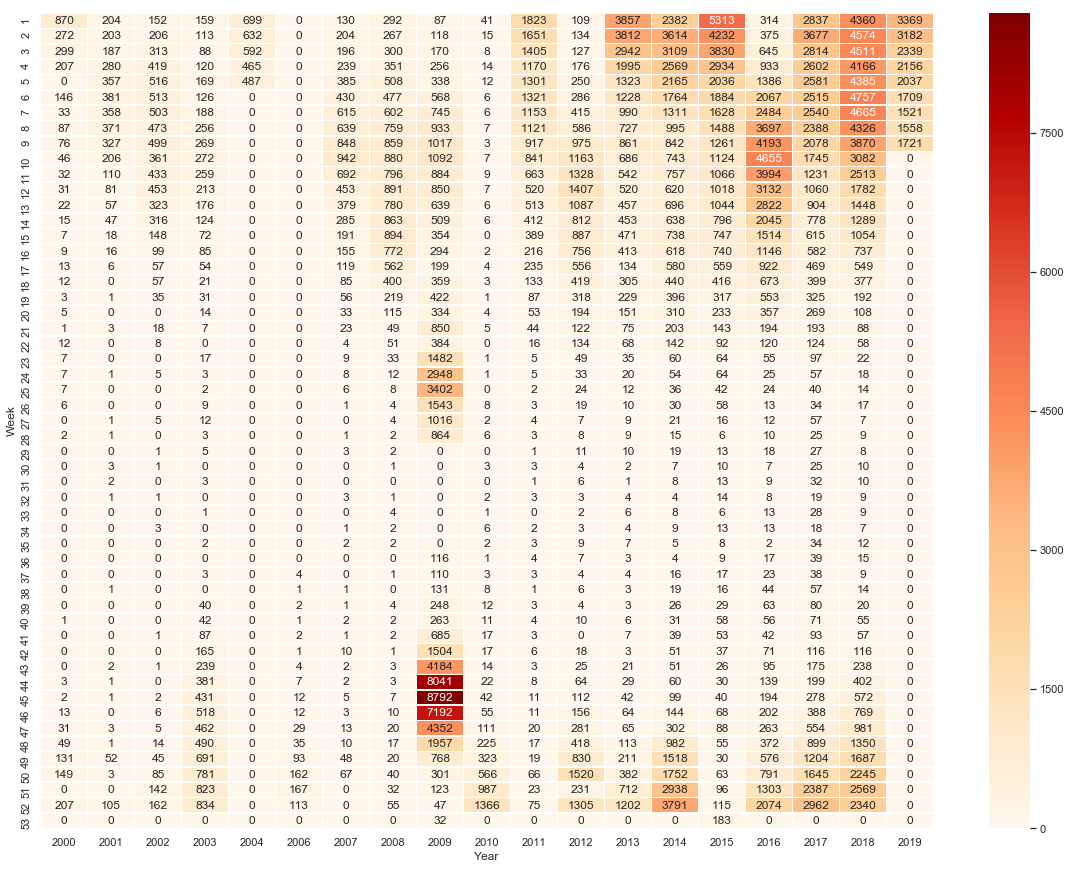

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
group = canada.groupby(['Year','Week'],as_index=False).ALL_INF.sum() 
outbreak = group.pivot("Week","Year", "ALL_INF")
outbreak = outbreak.fillna(0)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(outbreak, cmap='OrRd',annot=True, fmt='.0f',linewidths=.5, ax=ax)

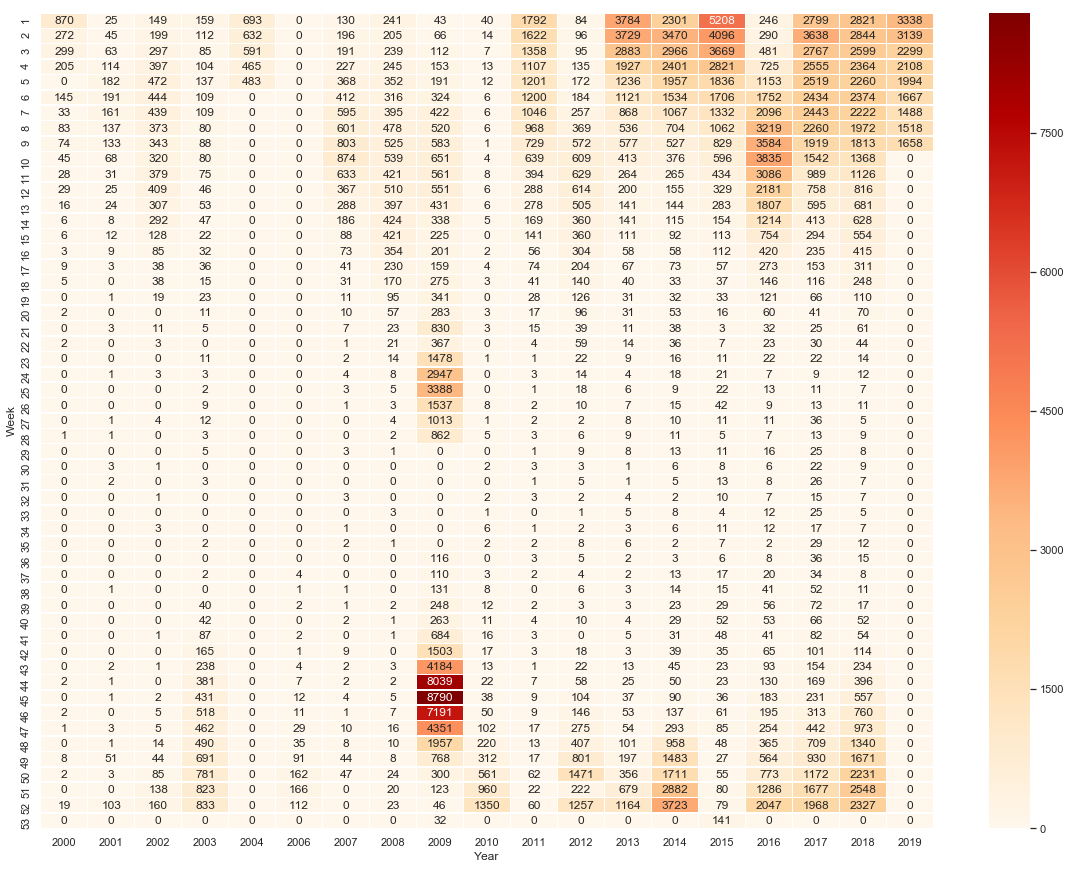

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
group = canada.groupby(['Year','Week'],as_index=False).INF_A.sum() 
outbreak = group.pivot("Week","Year", "INF_A")
outbreak = outbreak.fillna(0)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(outbreak, cmap='OrRd',annot=True, fmt='.0f',linewidths=.5, ax=ax)

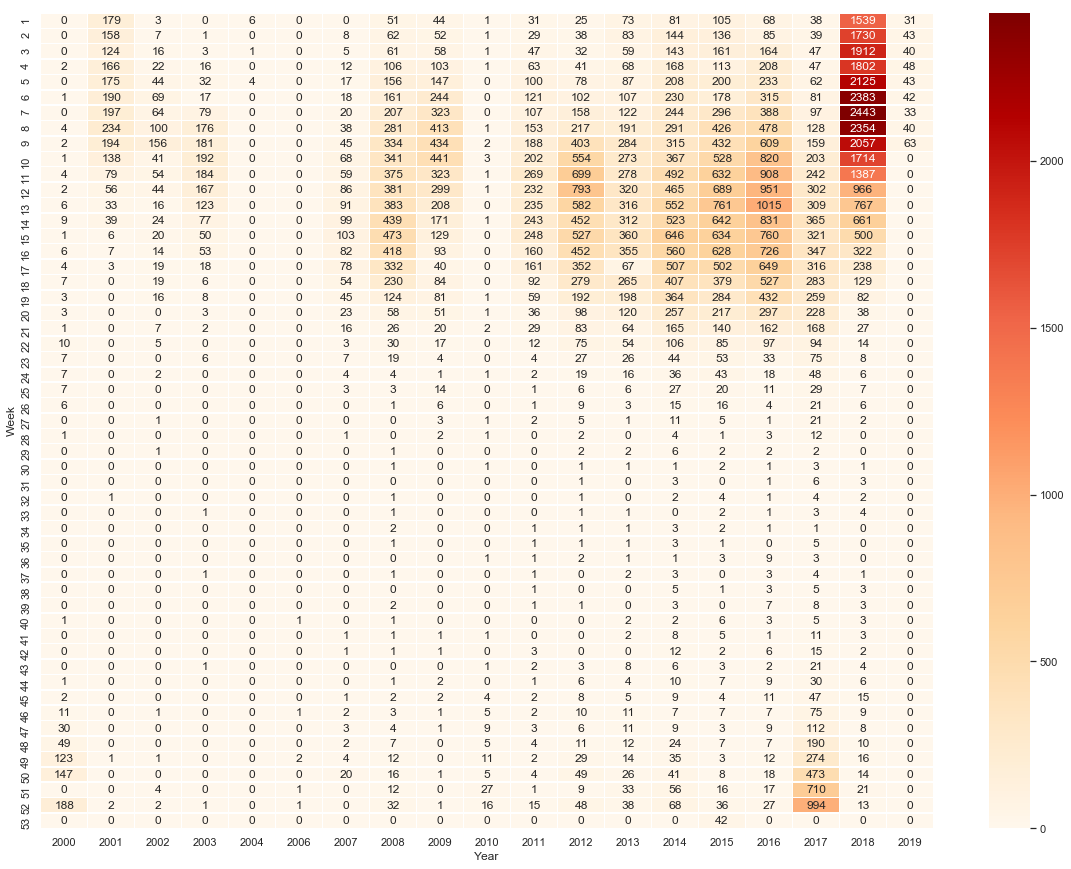

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
group = canada.groupby(['Year','Week'],as_index=False).INF_B.sum() 
outbreak = group.pivot("Week","Year", "INF_B")
outbreak = outbreak.fillna(0)
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(outbreak, cmap='OrRd',annot=True, fmt='.0f',linewidths=.5, ax=ax)

In [70]:
#creating the train and validation set
train = canada[:int(0.8*(len(canada)))]
valid = canada[int(0.8*(len(canada))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(maxlags=8)

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#converting predictions to dataframe

cols = canada.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,3):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j] 

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for who is :  5158.2029431037545
rmse value for influenza is :  21.277833902287213
rmse value for flu is :  6.153549304413029


c:\users\asus\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error

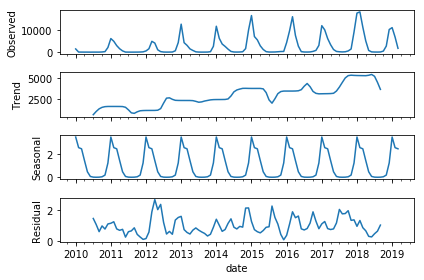

In [20]:
# from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(canada.who, model='multiplicative')
fig = result.plot()

In [19]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(canada['who_seasonal'][3:], start_p=0, start_q=0,
                           max_p=3, max_q=3, m=6,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,trend='n')
print(stepwise_model.aic())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 6); AIC=2011.975, BIC=2017.205, Fit time=0.142 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 6); AIC=2083.616, BIC=2086.231, Fit time=0.011 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 6); AIC=1998.691, BIC=2006.537, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 6); AIC=1999.927, BIC=2007.772, Fit time=0.208 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 6); AIC=2069.601, BIC=2074.832, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 6); AIC=2021.782, BIC=2032.243, Fit time=0.124 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 6); AIC=1994.320, BIC=2004.780, Fit time=0.298 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 6); AIC=1982.266, BIC=1997.957, Fit time=0.880 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 2, 6); AIC=1986.384, BIC=1999.460, Fit time=0.527 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_o

In [27]:
#creating the train and validation set
train = canada.who[:int(0.8*(len(canada)))]
exgo = canada[['influenza','flu']]
extrain = exgo[:int(0.8*(len(exgo)))]
test = canada.who[int(0.8*(len(canada))):]
extest = exgo[int(0.8*(len(exgo))):]

# stepwise_model.fit(train, exogenous=extrain)

In [67]:
future_forecast = stepwise_model.predict(n_periods=len(test),exogenous=extest)

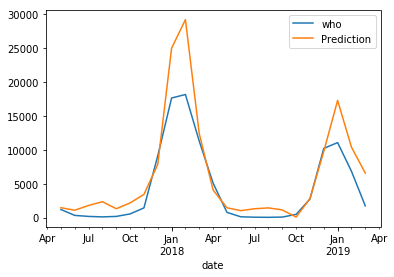

In [68]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot.line()

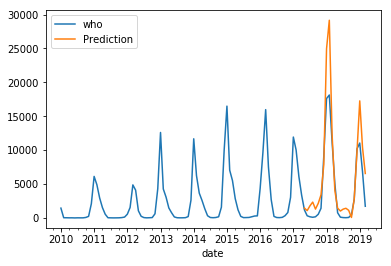

In [69]:
pd.concat([canada.who,future_forecast],axis=1).plot.line()

In [20]:
stepwise_model.fit(canada['who_seasonal'][3:])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 0, 6), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='n')

MAPE % is :  9867.864820043438


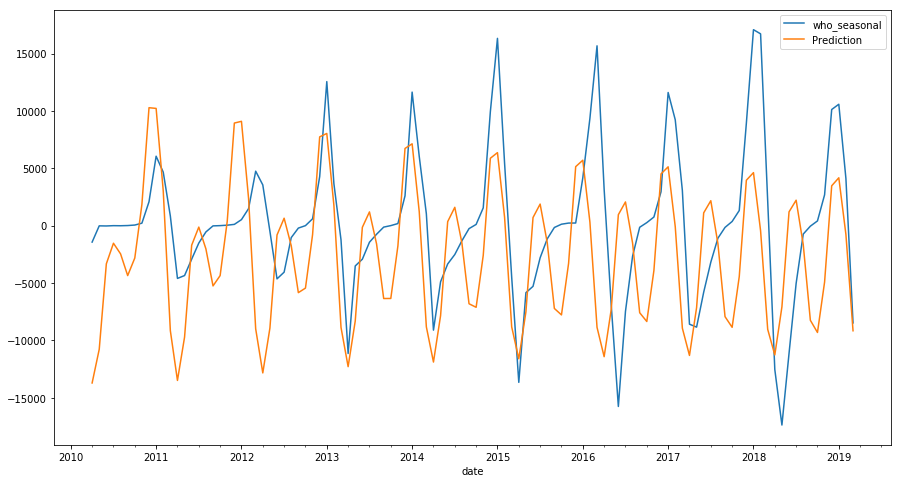

In [21]:
f, ax = plt.subplots(figsize=(15,8))
future_forecast = stepwise_model.predict(n_periods=len(canada['who_seasonal'][3:]))
future_forecast = pd.DataFrame(future_forecast,index = canada['who_seasonal'][3:].index,columns=['Prediction'])
pd.concat([canada['who_seasonal'][3:],future_forecast],axis=1).plot.line(ax=ax)
print('MAPE % is : ', np.mean(np.abs((canada.who.values - future_forecast.values) / canada.who.values)) * 100)

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error

print('rmse value is : ', sqrt(mean_squared_error(canada['who_seasonal'][3:],future_forecast)))

rmse value is :  5887.166196866266


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 8); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 8); AIC=1893.416, BIC=1901.291, Fit time=0.075 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 8); AIC=1864.759, BIC=1877.884, Fit time=0.576 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 8); AIC=1827.372, BIC=1840.496, Fit time=0.683 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 8); AIC=1840.767, BIC=1856.516, Fit time=0.761 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 8); AIC=1891.904, BIC=1902.404, Fit time=0.198 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 8); AIC=1840.842, BIC=1856.591, Fit time=1.279 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 8); AIC=1843.035, BIC=1861.410, Fit time=1.612 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 8); AIC=1835.095, BIC=1845.595, Fit time=0.278 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 

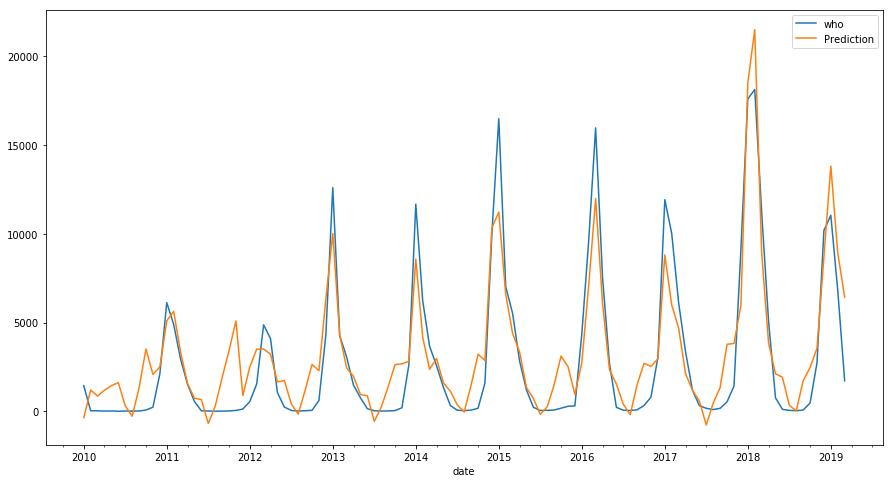

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pyramid.arima import auto_arima
stepwise_model = auto_arima(canada.who,exogenous=canada[['influenza','flu']], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=8,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,trend='n')
print(stepwise_model.aic())

stepwise_model.fit(canada.who,exogenous=canada[['influenza','flu']])

f, ax = plt.subplots(figsize=(15,8))
future_forecast = stepwise_model.predict(n_periods=len(canada.who),exogenous=canada[['influenza','flu']])
future_forecast = pd.DataFrame(future_forecast,index = canada.who.index,columns=['Prediction'])
pd.concat([canada.who,future_forecast],axis=1).plot.line(ax=ax)
print('MAPE % is : ', np.mean(np.abs((canada.who.values - future_forecast.values) / canada.who.values)) * 100)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 4); AIC=2111.599, BIC=2114.262, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 4); AIC=2077.906, BIC=2085.896, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 4); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 4); AIC=2099.916, BIC=2105.242, Fit time=0.025 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=2010.446, BIC=2021.100, Fit time=0.277 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 4); AIC=2014.923, BIC=2028.240, Fit time=0.528 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=2012.795, BIC=2020.785, Fit time=0.067 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 0, 4); AIC=1987.177, BIC=2000.494, Fit time=0.647 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 0, 4); AIC=n

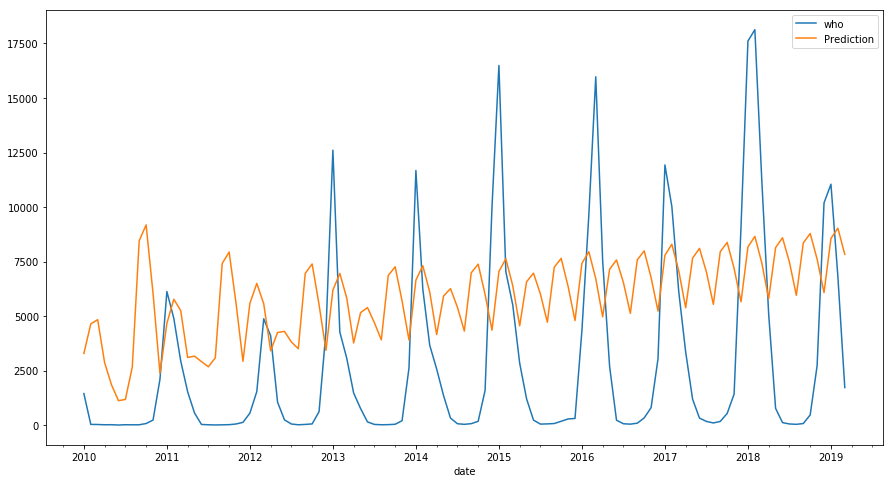

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from pyramid.arima import auto_arima
stepwise_model = auto_arima(canada.who,exogenous=None, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=4,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,trend='n')
print(stepwise_model.aic())

stepwise_model.fit(canada.who,exogenous=None)

f, ax = plt.subplots(figsize=(15,8))
future_forecast = stepwise_model.predict(n_periods=len(canada.who),exogenous=None)
future_forecast = pd.DataFrame(future_forecast,index = canada.who.index,columns=['Prediction'])
pd.concat([canada.who,future_forecast],axis=1).plot.line(ax=ax)
print('MAPE % is : ', np.mean(np.abs((canada.who.values - future_forecast.values) / canada.who.values)) * 100)

In [55]:
# type(canada.who)

# # for i in len(canada)
np.mean(np.abs((canada.who.values - future_forecast.values) / canada.who.values)) * 100

# ((canada.who[i] - future_forecast[i])/canada.who[i]))*100

# canada.who.values

5054.234809826031

## Test series stationarity

In [14]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
def test_stationarity(timeseries,strtitle):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean();
    rolstd = timeseries.rolling(window=12,center=False).std();

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title(strtitle)
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

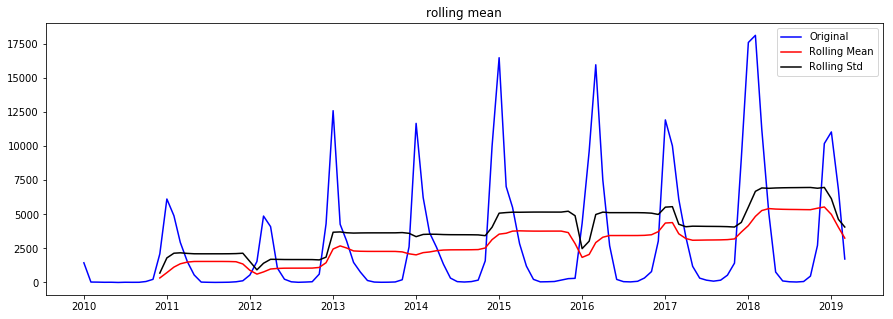

Results of Dickey-Fuller Test:
Test Statistic                 -1.508176
p-value                         0.529463
#Lags Used                     13.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


c:\users\asus\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


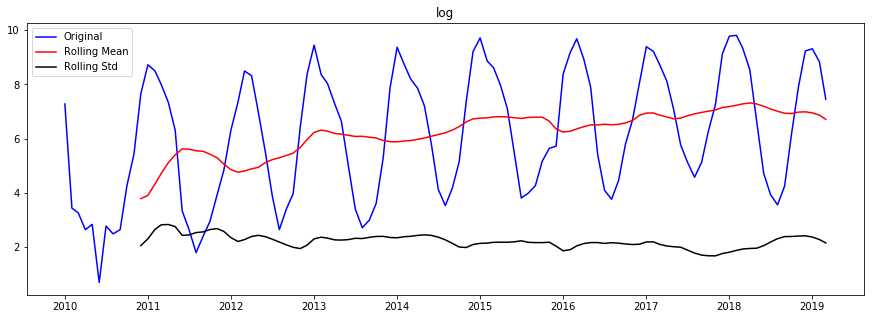

Results of Dickey-Fuller Test:
Test Statistic                 -1.874852
p-value                         0.343982
#Lags Used                     13.000000
Number of Observations Used    97.000000
Critical Value (1%)            -3.499637
Critical Value (5%)            -2.891831
Critical Value (10%)           -2.582928
dtype: float64


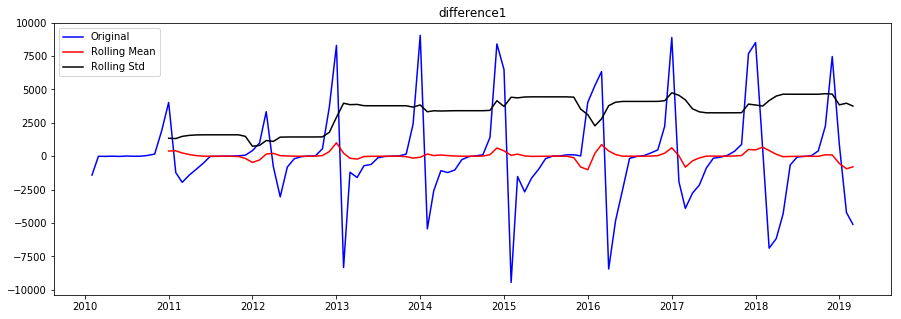

Results of Dickey-Fuller Test:
Test Statistic                 -3.869366
p-value                         0.002272
#Lags Used                     13.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


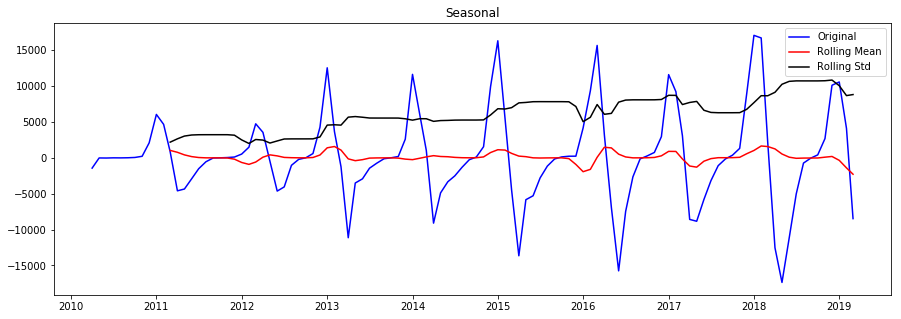

Results of Dickey-Fuller Test:
Test Statistic                -6.564329e+00
p-value                        8.231087e-09
#Lags Used                     1.000000e+01
Number of Observations Used    9.700000e+01
Critical Value (1%)           -3.499637e+00
Critical Value (5%)           -2.891831e+00
Critical Value (10%)          -2.582928e+00
dtype: float64


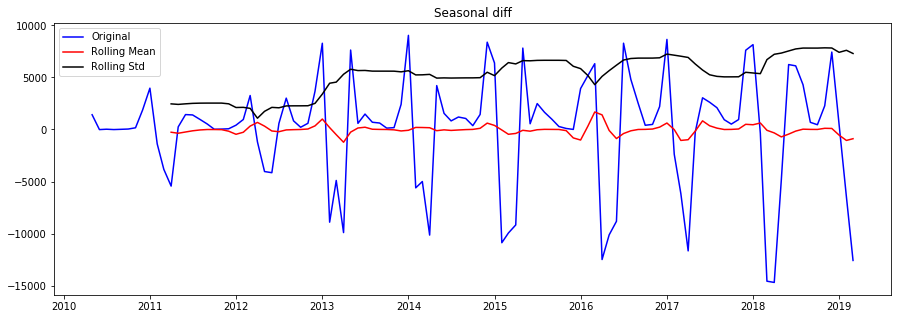

Results of Dickey-Fuller Test:
Test Statistic                -7.439791e+00
p-value                        6.048165e-11
#Lags Used                     1.100000e+01
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


In [15]:
test_stationarity(canada.who,'rolling mean'); #-3.796104
# Log is a minor improvement, meaning that the variance is stable
canada.who_log= canada.who.apply(lambda x: np.log(x))  
test_stationarity(canada.who_log,'log') #-3.830754'''
# Although I see no real global trend, 1st difference strongly improves stationarity
canada['who_diff'] = canada.who - canada.who.shift(1)  
test_stationarity(canada['who_diff'].dropna(inplace=False),'difference1') #-6.608968e+00
# Seasonal difference: take a weekly season improves stationarity even more
canada['who_seasonal'] = canada.who - canada.who.shift(3)
test_stationarity(canada['who_seasonal'].dropna(inplace=False),'Seasonal') #-7.196314e+00
# Seasonal and 1st difference is even better, but we were already well within the 1% confidence interval
canada['who_seasonal_diff'] = canada['who_diff'] - canada['who_diff'].shift(3)
test_stationarity(canada['who_seasonal_diff'].dropna(inplace=False),'Seasonal diff') #-9.427797e+00

ACF and PACF of the visit mean:


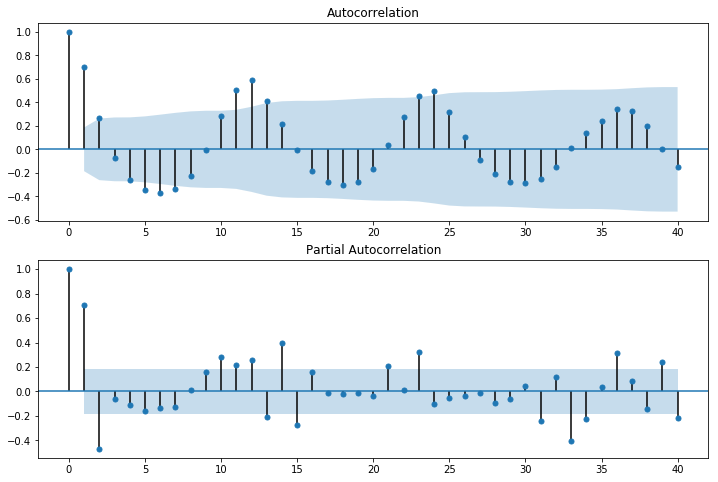

In [18]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(canada.who, lags=40, alpha=.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(canada.who, lags=40, alpha=.05, ax=ax2)
print("ACF and PACF of the visit mean:")

<Figure size 432x288 with 0 Axes>

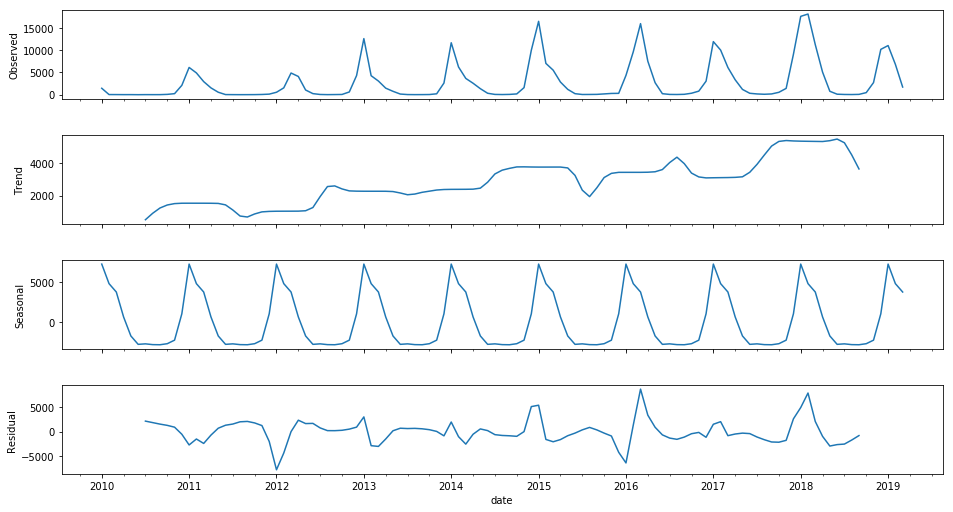

In [19]:
decomposition = seasonal_decompose(canada.who, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

ACF and PACF of the 3-day differenced visit mean:


c:\users\asus\anaconda3\envs\tensorflowgpu\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


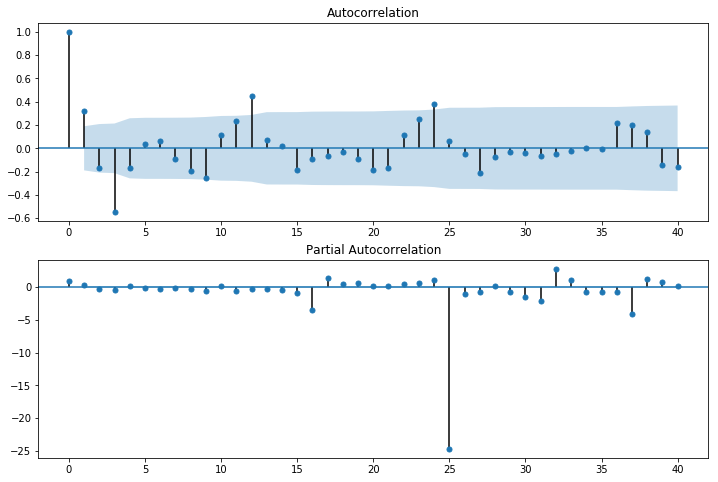

In [22]:
print("ACF and PACF of the 3-day differenced visit mean:")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(canada.who_seasonal_diff[4:], lags=40, alpha=.05, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(canada.who_seasonal_diff[4:], lags=40, alpha=.05, ax=ax2)